In [1]:
import numpy as np
from matplotlib import cm, pyplot as plt
from scipy.misc import imread, imsave
from scipy import linalg as la
from numpy.random import randint

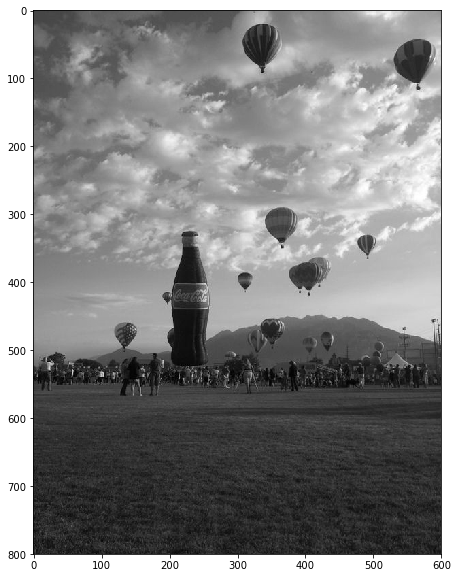

In [34]:
# To read in an image, convert it to grayscale, and rescale it.
picture = imread('balloon.jpg', flatten=True) * 1./255
# To display the picture as grayscale
plt.figure(figsize=(10,10))
plt.imshow(picture, cmap=cm.gray)
plt.show()

In [3]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    M, L = U.shape # M -y direction, L- x-direction
    
    for n in range(N):
        
        #Fill in padding
        U_temp = np.zeros((M+2, L+2))
        U_temp[1:-1, 1:-1] = U
        
        #Fill in Top:
        U_temp[0,1:-1] = U[0,:]
        #Bottom:
        U_temp[-1, 1:-1] = U[-1,:]
        #Left:
        U_temp[1:-1, 0] = U[:, 0]
        #Right:
        U_temp[1:-1, -1] = U[:, -1]
        
        U_temp[1:-1, 1:-1] = U_temp[1:-1, 1:-1] + lambda_*(g(np.abs(U_temp[0:-2, 1:-1] - U_temp[1:-1, 1:-1]))*(U_temp[0:-2, 1:-1] - U_temp[1:-1, 1:-1]) 
                                          + g(np.abs(U_temp[2:, 1:-1] - U_temp[1:-1, 1:-1]))*(U_temp[2:, 1:-1] - U_temp[1:-1, 1:-1]) 
                                          + g(np.abs(U_temp[1:-1, 0:-2] - U_temp[1:-1, 1:-1]))*(U_temp[1:-1, 0:-2] - U_temp[1:-1, 1:-1]) 
                                          + g(np.abs(U_temp[1:-1, 2:] - U_temp[1:-1, 1:-1]))*(U_temp[1:-1, 2:] - U_temp[1:-1, 1:-1]))
        U = U_temp[1:-1, 1:-1]
    return U


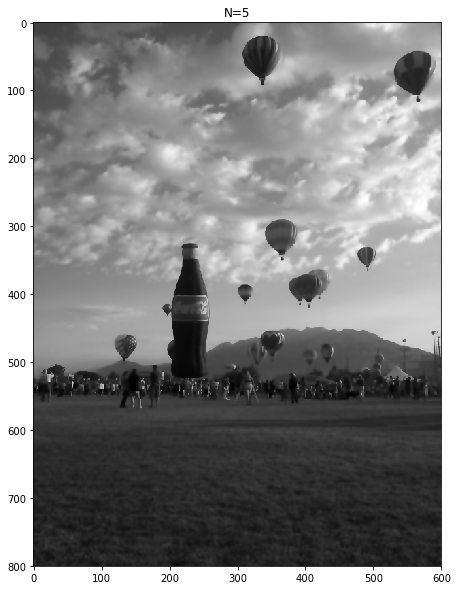

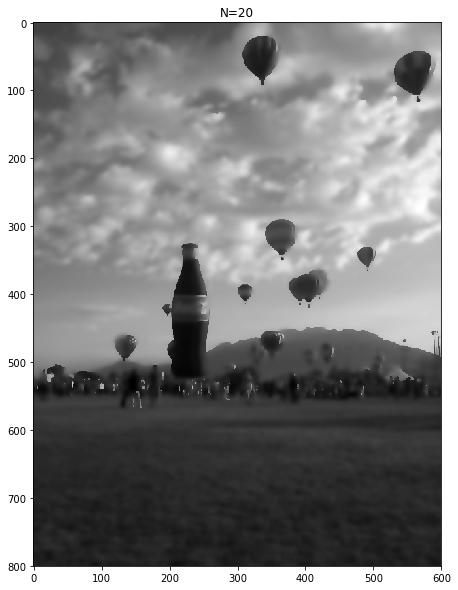

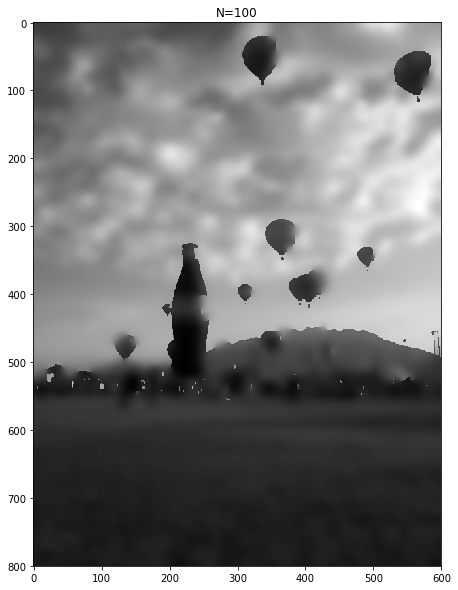

In [58]:
ans = []
sigma = 0.1
lamb = 0.25
N= [5,20,100]
g = lambda x: np.exp(-(x/sigma)**2)

# U = anisdiff_bw(picture, 5, lamb, g)
for i in N:
    U_1 = anisdiff_bw(picture, i, lamb, g)
    plt.figure(figsize=(10,10))
    plt.imshow(U_1, cmap=cm.gray)
    plt.title("N="+ str(i))
    plt.show()

In [46]:
def anisdiff_color(U, N, lambda_, sigma):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    M, L, C = U.shape # L -y direction, M- x-direction
#     U_n_1 = np.zeros_like(U)
    
    for n in range(N):
#          M, L = U.shape # M -y direction, L- x-direction
    
        #Fill in padding
        U_temp = np.zeros((M+2, L+2,C))
        U_temp[1:-1, 1:-1] = U
        
        #Fill in Top:
        U_temp[0,1:-1] = U[0,:]
        #Bottom:
        U_temp[-1, 1:-1] = U[-1,:]
        #Left:
        U_temp[1:-1, 0] = U[:, 0]
        #Right:
        U_temp[1:-1, -1] = U[:, -1]
        
        U_temp[1:-1, 1:-1] = U_temp[1:-1, 1:-1] + lambda_*(g(norm(U_temp[0:-2, 1:-1] - U_temp[1:-1, 1:-1]))*(U_temp[0:-2, 1:-1] - U_temp[1:-1, 1:-1]) 
                                          + g(norm(U_temp[2:, 1:-1] - U_temp[1:-1, 1:-1]))*(U_temp[2:, 1:-1] - U_temp[1:-1, 1:-1]) 
                                          + g(norm(U_temp[1:-1, 0:-2] - U_temp[1:-1, 1:-1]))*(U_temp[1:-1, 0:-2] - U_temp[1:-1, 1:-1]) 
                                          + g(norm(U_temp[1:-1, 2:] - U_temp[1:-1, 1:-1]))*(U_temp[1:-1, 2:] - U_temp[1:-1, 1:-1]))
        U = U_temp[1:-1, 1:-1]
        
    return U
#     pass


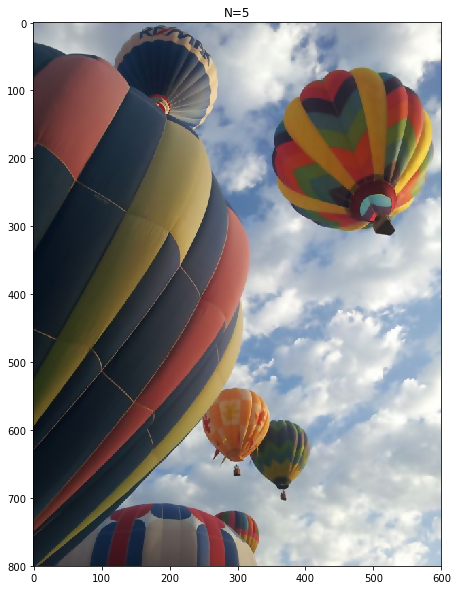

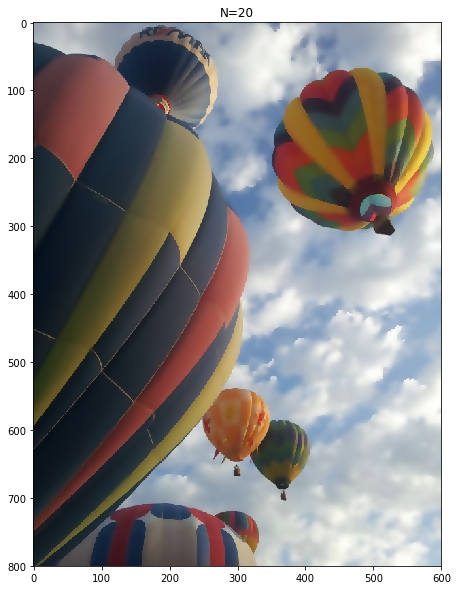

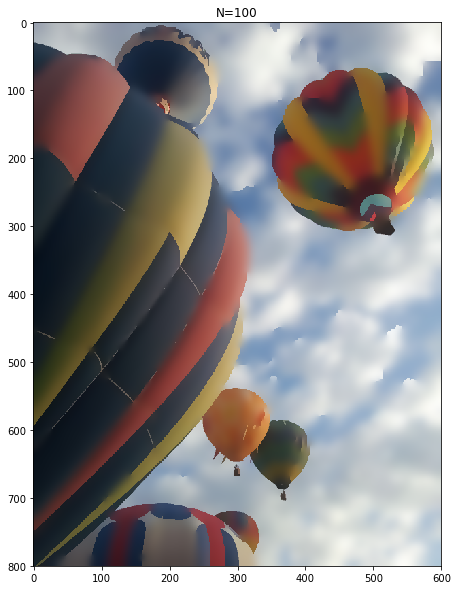

In [60]:
ans = []
sigma = 0.1
lamb = 0.25
N= [5,20,100]
g = lambda x: np.exp(-(x/sigma)**2)

picture2 = imread('balloons_color.jpg', flatten=False) * 1./255
# plt.figure(figsize=(10,10))
for i in N:
    U_1 = anisdiff_color(picture2, i, lamb, g)
    plt.figure(figsize=(10,10))
    plt.imshow(U_1)
    plt.title("N="+ str(i))
    plt.show()


In [4]:
image = imread('balloon.jpg', flatten=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

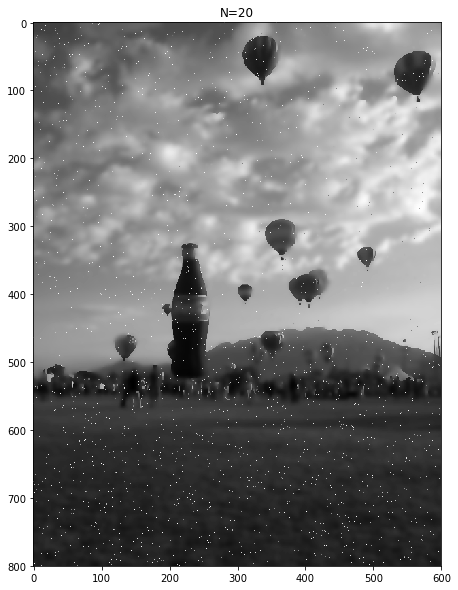

In [5]:
sig = 0.1
lam = 0.25
N = 20
g = lambda x: np.exp(-(x/sig)**2)

U_1 = anisdiff_bw(image* 1./255, N, lam, g)
plt.figure(figsize=(10,10))
plt.imshow(U_1, cmap=cm.gray)
plt.title("N="+ str(N))
plt.show()

## Notice that anisotropic diffusion, depending on the image,may smear out edges that do not have large differences between them. As we can see, after 20 iterations, some of the boundaries between similar shades of grey have smeared unevenly. So it does not smooth the noise.